In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
mean_abs_error = []
mean_squared_error = []
root_mean_squared_error = []

In [22]:
# Key Idea - 1
# Train data - 2016
# Test data - 2017
# Area wise clustering - NO
# Independent parameters - Timeslots (morning, noon, evening, night), day of week
# Dependent parameter - average speed of the trip
# Outliers removed using - z score

# Get CSV file
df = pd.read_csv("july2016.csv", sep=',', usecols=['day','timeslot', 'speed'])  

# # Removing outliers from data
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]

# # Extracting train data from data frame
X = df[['day','timeslot']]
Y = df['speed'] 
print(X)
print(Y)

# # Running regression
regressor = LinearRegression()  
regressor.fit(X, Y)

# # Calculating error with test data - 2017
df_2017 = pd.read_csv("july2017.csv", sep=',', usecols=['day','timeslot', 'speed'])  

# # # Removing outliers from test data
z = np.abs(stats.zscore(df_2017))
df_2017 = df_2017[(z < 3).all(axis=1)]


# # Extracting test data
X_2017 = df_2017[['day','timeslot']]
y_2017 = df_2017['speed'] 

# # Prediction using the model
y_pred = regressor.predict(X_2017)

         day  timeslot
0          6         1
1          1         1
2          4         1
3          5         1
4          6         1
...      ...       ...
2226458    1        24
2226459    1        24
2226460    4        24
2226461    6        24
2226462    3        24

[2220547 rows x 2 columns]
0          43.103679
1          41.089224
2          39.593909
3          52.105263
4          51.192661
             ...    
2226458    31.928571
2226459    27.000000
2226460    33.333333
2226461    29.272727
2226462     7.920000
Name: speed, Length: 2220547, dtype: float64


In [23]:
# Plotting for key idea  1


# df = pd.DataFrame({'Actual': y_2017, 'Predicted': y_pred})
# df1 = df.head(25)

# df_2017.plot(kind='bar',figsize=(10,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_2017, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_2017, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_2017, y_pred)))

Mean Absolute Error: 20.309075433490403
Mean Squared Error: 528.1940972052504
Root Mean Squared Error: 22.982473696389828


In [17]:
# df_hourly = pd.read_csv("hourly_data_2016.csv", sep=',')  

In [3]:
# Q1 = df_hourly.quantile(0.25)
# Q3 = df_hourly.quantile(0.75)
# IQR = Q3 - Q1

In [4]:
# df_hourly_out = df_hourly[~((df_hourly < (Q1 - 1.5 * IQR)) |
#                             (df_hourly > (Q3 + 1.5 * IQR))).any(axis=1)]
# df_hourly_out.shape

(24433115, 4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# df_mean_hourly_day = (df_hourly_out.groupby(['day']).mean())
# print(df_mean_hourly_day)

         speed  constant   timeslot
day                                
1    14.360120       1.0  11.292140
2    13.327804       1.0  14.052842
3    12.612600       1.0  14.455455
4    12.387587       1.0  14.528160
5    12.338301       1.0  14.479678
6    12.179833       1.0  14.318614
7    12.845556       1.0  13.209446


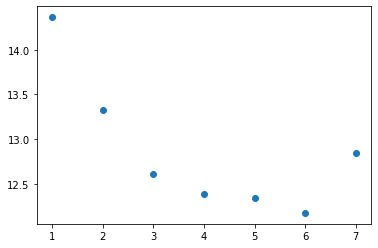

In [18]:
# days = np.arange(1, 8)
# plt.scatter(days, df_mean_hourly_day['speed'])

In [19]:
# X_hourly = df_hourly_out[['timeslot', 'day']]
# y_hourly = df_hourly_out['speed']
# regressor = LinearRegression()
# regressor.fit(X_hourly, y_hourly)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# df_hourly_2017 = pd.read_csv("hourly_data_2017.csv", sep=',', usecols=['day','timeslot', 'speed'])  

# print('Before removing outliers', df_hourly_2017.shape)

# # Removing outliers from test data
# Q1 = df_hourly_2017.quantile(0.25)
# Q3 = df_hourly_2017.quantile(0.75)
# IQR = Q3 - Q1
# df_hourly_2017_out = df_hourly_2017[~((df_hourly_2017 < (Q1 - 1.5 * IQR)) |
#                             (df_hourly_2017 > (Q3 + 1.5 * IQR))).any(axis=1)]

# print('After removing outliers', df_hourly_2017_out.shape)

# # Extracting X and y from test data
# X_hourly_2017 = df_hourly_2017_out[['day','timeslot']]
# y_hourly_2017 = df_hourly_2017_out['speed'] 

# # Running prediction using 2017 (test) data
# y_pred = regressor.predict(X_hourly_2017)

# # Finding the errors
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_hourly_2017, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_hourly_2017, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hourly_2017, y_pred)))

Before removing outliers (21937447, 3)
After removing outliers (20547402, 3)
Mean Absolute Error: 5.12317125036677
Mean Squared Error: 46.77656691127226
Root Mean Squared Error: 6.83933965462107


In [33]:
# df = pd.DataFrame({'Actual': y_hourly_2017, 'Predicted': y_pred})
# df1 = df.head(25)

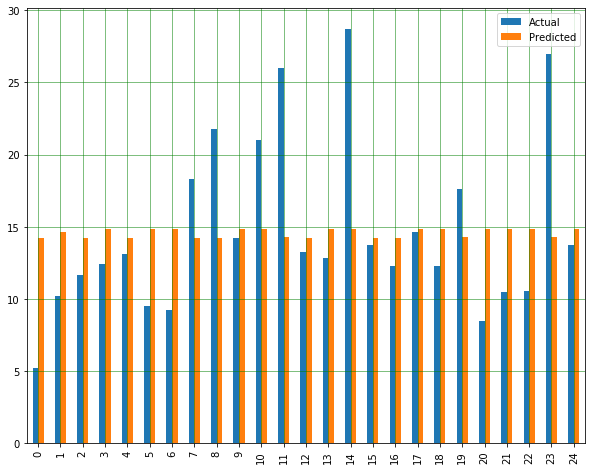

In [34]:
# df1.plot(kind='bar',figsize=(10,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()